# Visualizations

## Normalized View

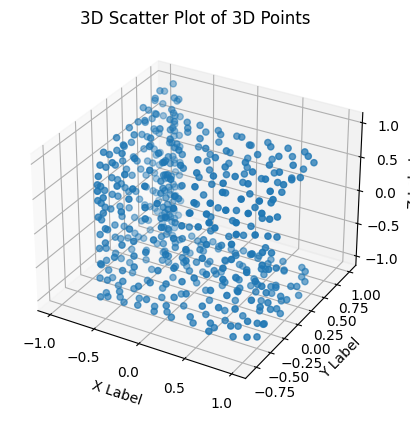

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
array = np.load("npy/input_norm.npy")

# Get the maximum absolute values for each axis and normalize the coordinates
max_vals = np.abs(array).max(axis=0)
normalized_chair_model = array / max_vals

ax.scatter(normalized_chair_model[:, 0], normalized_chair_model[:, 1], normalized_chair_model[:, 2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot of 3D Points', color='black')
plt.show()

## Rips Complex View

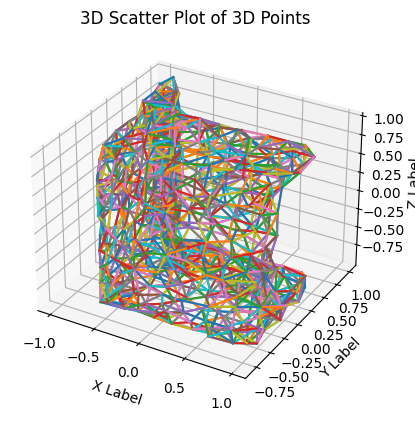

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from scipy.spatial.distance import cdist

def plot_triangulation(points, segment_pairs):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        # ax.scatter(points[:, 0], points[:, 1], points[:, 2])

        for i in range(segment_pairs[0].shape[0]):
            point1 = segment_pairs[0][i]
            point2 = segment_pairs[1][i]
            ax.plot([point1[0], point2[0]], [point1[1], point2[1]], [point1[2], point2[2]])

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')
        ax.set_title('3D Scatter Plot of 3D Points', color="black")
        plt.show()

def graph_maker(points, alpha):
    distances = cdist(points, points)
    mask = distances < alpha
    i_indices, j_indices = np.where(mask)
    filtered_pairs = point_cloud[i_indices], point_cloud[j_indices]
    # np.column_stack((i_indices, j_indices))
    return filtered_pairs

def rotate_points_x_axis(points, theta):
    rotation_matrix = np.array([
        [1, 0, 0],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta), np.cos(theta)]
    ])
    rotated_points = points.dot(rotation_matrix.T)
    
    return rotated_points

def rotate_points_y_axis(points, theta):
    rotation_matrix = np.array([
        [np.cos(theta), 0, np.sin(theta)],
        [0, 1, 0],
        [-np.sin(theta), 0, np.cos(theta)]
    ])
    rotated_points = points.dot(rotation_matrix.T)
    
    return rotated_points

def rotate_points_z_axis(points, theta):
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])
    rotated_points = points.dot(rotation_matrix.T)
    
    return rotated_points

point_cloud = np.load("npy/input_norm.npy")
points = point_cloud
alpha = 0.30

theta = np.radians(0)
# rotated_points = rotate_points_y_axis(points, theta)
# rotated_points = rotate_points_x_axis(points, 90)
# rotated_points = rotate_points_y_axis(rotated_points, theta)

segment_pairs = graph_maker(points, alpha)
plot_triangulation(points, segment_pairs)

## Persistence point View

[1, 25]
268 268


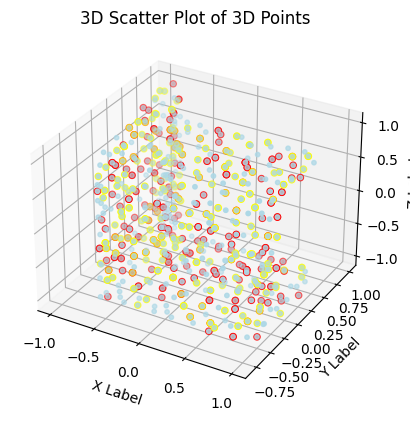

In [6]:
import gudhi
from gudhi.wasserstein import wasserstein_distance
import torch
import numpy as np

# pts = torch.FloatTensor(np.load("npy/input_norm.npy"))
# pts = torch.FloatTensor(np.load("npy/target_norm.npy"))
pts = torch.FloatTensor(np.load("npy/input_norm.npy"))

rips = gudhi.RipsComplex(points=pts, max_edge_length=0.3)

# .5 because it is faster and, experimentally, the cycles remain smaller
st = rips.create_simplex_tree(max_dimension=2)
st.compute_persistence(min_persistence=.04)

print(st.betti_numbers())


i = st.flag_persistence_generators()


if ( len(i[1]) == 0):
    print('shit')
    i1 = torch.tensor(i[0])
    diag1 = torch.norm(pts[i1[:, (0, 0)]] - pts[i1[:, (1, 2)]], dim=-1)


i1 = torch.tensor(i[1][0])

diag1 = torch.norm(pts[i1[:, (0, 2)]] - pts[i1[:, (1, 3)]], dim=-1)

b_points = pts[i1[:, (0, 2)]]
d_points = pts[i1[:, (1, 3)]]

b_critical = b_points.view(b_points.shape[0]*b_points.shape[1], 3)
d_critical = d_points.view(d_points.shape[0]*d_points.shape[1], 3)

print(b_critical.shape[0], d_critical.shape[0])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(d_critical[:, 0], d_critical[:, 1], d_critical[:, 2], color='yellow', s=20)
ax.scatter(b_critical[:, 0], b_critical[:, 1], b_critical[:, 2], color='red', s=20)
ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2], color='lightblue', s=10)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot of 3D Points', color="black")
plt.show()

## Interactive View

In [3]:
from scipy.spatial.distance import cdist
import numpy as np
import open3d as o3d

def graph_maker(points, alpha):
    distances = cdist(points, points)
    mask = distances < alpha
    i_indices, j_indices = np.where(mask)
    ijPairs = np.column_stack((i_indices, j_indices))
    return ijPairs

def open3dVisualize(filename, alpha):
    point_cloud = np.load(filename)
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(point_cloud)
    lines = graph_maker(point_cloud, alpha)
    line_set = o3d.geometry.LineSet()
    line_set.points = o3d.utility.Vector3dVector(point_cloud)
    line_set.lines = o3d.utility.Vector2iVector(lines)
    o3d.visualization.draw_geometries([line_set])

def open3dVisualizeCam(data, alpha, type=0):
    vis = o3d.visualization.Visualizer()
    vis.create_window()

    point_cloud = []
    if type == 0:
        point_cloud = np.load(data)
    if type == 1:
        point_cloud = data
    
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(point_cloud)
    lines = graph_maker(point_cloud, alpha)
    line_set = o3d.geometry.LineSet()
    line_set.points = o3d.utility.Vector3dVector(point_cloud)
    line_set.lines = o3d.utility.Vector2iVector(lines)

    vis.add_geometry(line_set)

    ctr = vis.get_view_control()
    ctr.set_lookat([0, 0, 0])      # Center of the view
    ctr.set_front([10, 0, 0])       # Camera position
    ctr.set_up([0, 1, 0])          # Up direction
    ctr.set_zoom(0.9)              # Zoom level

    vis.run()
    vis.destroy_window()

def rotate_points_y_axis(points, theta):
    rotation_matrix = np.array([
        [np.cos(theta), 0, np.sin(theta)],
        [0, 1, 0],
        [-np.sin(theta), 0, np.cos(theta)]
    ])
    rotated_points = points.dot(rotation_matrix.T)
    
    return rotated_points

point_cloud_inp = np.load("npy/input_norm.npy")
point_cloud_out = np.load("output_3d.npy")
point_cloud_tar = np.load("npy/target_norm.npy")

points = point_cloud_out


# theta = np.radians(90)
# rotated_points = rotate_points_y_axis(points, theta)


open3dVisualizeCam(points, 0.3, 1)
# open3dVisualizeCam(rotated_points, 0.3, 1)
# open3dVisualizeCam(rotate_point_cloud, 0.3, 1)

# open3dVisualizeCam("npy/input_norm.npy", 0.3)
# open3dVisualize("output_3d.npy", 0.3)
# open3dVisualize("npy/target_norm.npy", 0.3)

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 


# Downsampling point cloud

In [ ]:
import open3d as o3d
import numpy as np

point_cloud_data = np.load("filename.npy")
point_cloud = o3d.geometry.PointCloud()
point_cloud.points = o3d.utility.Vector3dVector(point_cloud_data)

num_samples = 500   # numumber of points to reduce to
downsampled_point_cloud = point_cloud.farthest_point_down_sample(num_samples)
dpc = np.asarray(downsampled_point_cloud.points)
np.save("downsampled_point_cloud.npy", dpc)